In [17]:
import pandas as pd 
import os
import numpy as np
import xgboost as xgb
import lightgbm as lgbm
import utils as ut
from collections import defaultdict
import operator 
import plotly as py
import seaborn as sns
from plotly import tools
import plotly.graph_objs as go
from scipy.stats import skew, boxcox

sns.set(color_codes=True)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
BIKE_ROOT = os.path.abspath("./data")
TRAIN_FILE = os.path.join(BIKE_ROOT, 'train.csv')
TEST_FILE = os.path.join(BIKE_ROOT, 'test.csv')
SAMPLE_FILE = os.path.join(BIKE_ROOT, 'sampleSubmission.csv')

assert os.path.exists(BIKE_ROOT)
assert os.path.exists(TRAIN_FILE)
assert os.path.exists(TEST_FILE)
assert os.path.exists(SAMPLE_FILE)

In [19]:
tr_te, train_len, test_len = ut.load_files(TRAIN_FILE, TEST_FILE)
tr_te = ut.time_vars_parser(tr_te, var_to_parse = 'datetime')

# add a count_season column using join
by_season = tr_te[tr_te['ix_train'] == 1].groupby('season')[['count']].agg(sum)
by_season.columns = ['count_season']
tr_te = tr_te.join(by_season, on='season')
tr = tr_te.loc[:train_len-1,:]

DONE: data loading
DONE: date parsing


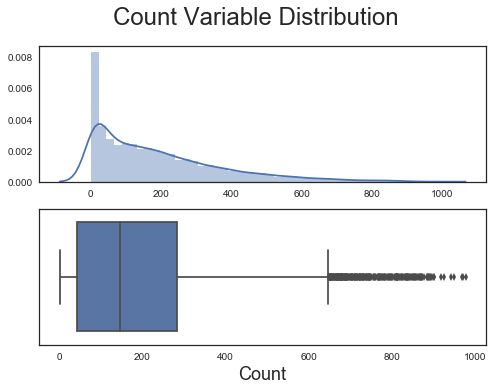

In [131]:
f, (ax1, ax2) = plt.subplots(2)
fig = sns.boxplot(tr['count'].values, ax=ax2);
fig = sns.distplot(tr['count'].values, ax=ax1);
fig.figure.suptitle("Count Variable Distribution", fontsize = 24)
plt.xlabel('Count', fontsize=18);
# plt.ylabel('Density', fontsize=16);
plt.savefig("test.jpg")

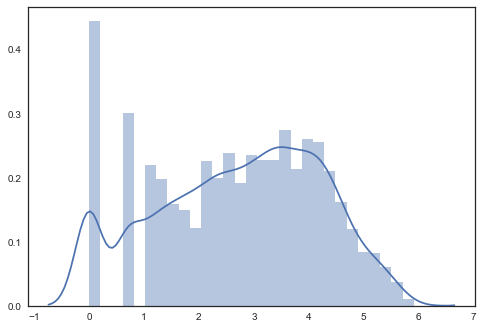

In [126]:
sns.set(style="white")
sns.distplot(np.log(tr['casual'].values+1 ));

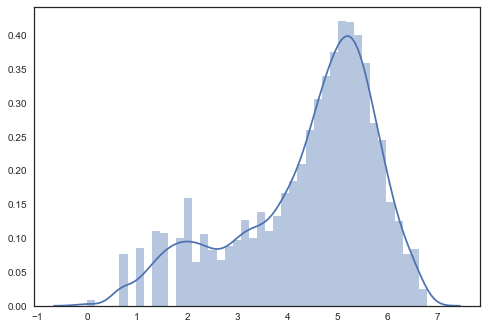

In [127]:
sns.set(style="white")
sns.distplot(np.log(tr['registered'].values+1 ));

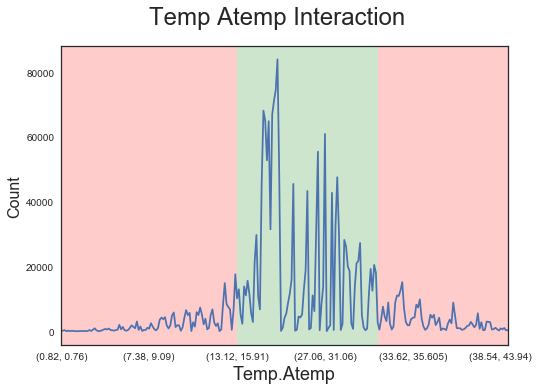

In [132]:
# chilled
sns.set(style="white")
fig = tr_te[tr_te['ix_train'] == 1].copy().groupby(['temp', 'atemp'])['count'].agg('sum').plot();

fig.figure.suptitle("Temp Atemp Interaction", fontsize = 24)
plt.xlabel('Temp.Atemp', fontsize=18);
plt.ylabel('Count', fontsize=16);
plt.axvspan(0, 100, facecolor='red', alpha=0.2)
plt.axvspan(100, 180, facecolor='green', alpha=0.2)
plt.axvspan(180, 300, facecolor='red', alpha=0.2)
plt.savefig("tempatemp.jpg")

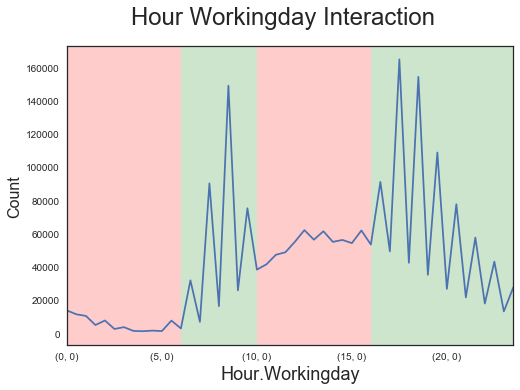

In [133]:
# rush_
sns.set(style="white")
fig = tr_te[tr_te['ix_train'] == 1].copy().groupby(['hour', 'workingday'])['count'].agg('sum').plot();
fig.figure.suptitle("Hour Workingday Interaction", fontsize = 24);
plt.xlabel('Hour.Workingday', fontsize=18);
plt.ylabel('Count', fontsize=16);
plt.axvspan(0, 12, facecolor='red', alpha=0.2);
plt.axvspan(12, 20, facecolor='green', alpha=0.2);
plt.axvspan(20, 32, facecolor='red', alpha=0.2);
plt.axvspan(32, 400, facecolor='green', alpha=0.2);
plt.savefig("hworking.jpg")

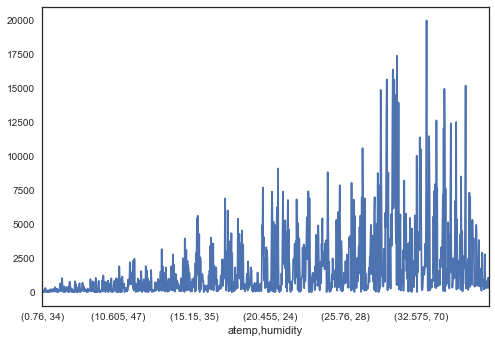

In [15]:
# dry
sns.set(style="white")
tr_te[tr_te['ix_train'] == 1].copy().groupby(['atemp','humidity'])['count'].agg('sum').plot();